In [6]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


PCA使用方差作为信息量衡量指标，方差越大信息量越大，并用特征值分解来（原理上，实际上是先通过SVD找出，然后再运用PCA的方差指标衡量，不用SVD的奇异值指标）找出新维度空间V，降维完成之后PCA的每个新特征就叫做主成分
+ $X->Q{\sum}Q^{-1}$
+ $SVD:X->U{\sum}V^{T}$

在矩阵分解过程中，会产生比原来的特征矩阵更大的矩阵，(m,n)分解为(m,k)*(k,n),降维算法计算量很大
但SVD可以不计算协方差矩阵，直接一步就计算到$V^{T}$，而这就是新向量形成的n维空间
右奇异矩阵有如下性质：
+ $X_{dr}=X*V[:k],X∈(m,n),X_{dr}∈(m,k),V[:k]∈(n,k)$ 

k即n_components,就是说，奇异值分解可以直接求出新特征空间和降维后的特征矩阵
### 特征选择与PCA
特征选择是在特征中选取携带信息最多的，选完之后的特征含义仍然是相同的
但降维之后的特征，已经不是原来矩阵中特征的含义，不具有可读性，算是新特征，故无法解释特征与标签之间的关系，在线性回归中，我们使用特征选择

### 参数
n_components:保留的特征数量,除了输入数字，还可以输入'mle':最大似然估计，自动选择数量，但是相对计算量很大
还可以：PCA(n_components=0.97,svd_solver="full"/"auto")表示希望降维后解释性方差占比大于97，自动选择特征数量
### 属性
pca.explained_variance_ 查看新特征向量上的信息量大小
pca.explained_variance_ratio_ 带有原信息的比例，加起来不等于1，少的就是损失的信息
pca.n_components_ 返回新特征空间即V矩阵(k,n)
### 方法
pca.get_covariance() 获取协方差矩阵

pca.inverse_transform()

In [60]:
data=load_iris()
x=data.data
y=data.target

In [61]:
x_dr=PCA(2).fit_transform(x)

In [27]:
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


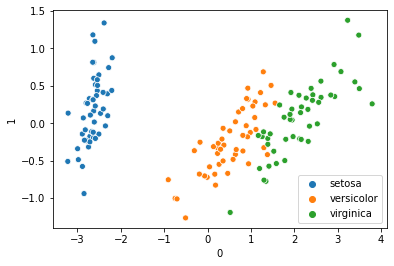

In [55]:
x_dr=pd.DataFrame(x_dr)
dic1={0:data.target_names[0],1:data.target_names[1],2:data.target_names[2]}
sns.scatterplot(0,1,hue=pd.Series(y).map(dic1),data=x_dr)
plt.show()

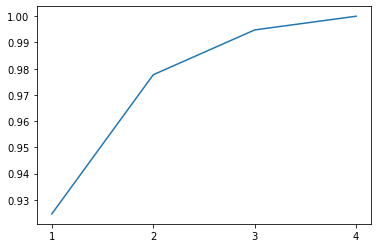

In [71]:
# 选取n_components的方法，曲线
pca=PCA(4).fit(x)
x_dr=pca.transform(x)
list1=np.cumsum(pca.explained_variance_ratio_)
plt.plot([1,2,3,4],list1)
plt.xticks(range(1,5),[1,2,3,4])
plt.show()

## 人脸识别案例

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces=fetch_lfw_people(min_faces_per_person=60)
faces.images.shape
#1348张图，每张图分成62行47列，每个点是一个像素

(1348, 62, 47)

In [35]:
faces.data.shape
# 62*47=2914
X=faces.data
Y=faces.target

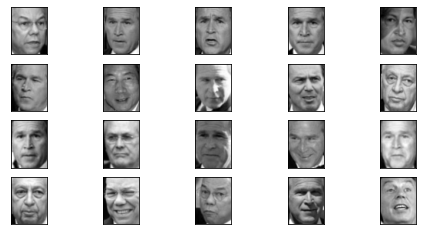

In [34]:
#创建画布和子图对象 
fig,axes = plt.subplots(4,5,figsize=(8,4),
                        subplot_kw = {"xticks":[],"yticks":[]}) #不要显示坐标轴 
for i,ax in enumerate(axes.flatten()):#二维不适于循环，故降维
    ax.imshow(faces.images[i,:,:],cmap="gray")#色彩模式colormap
plt.show()

In [36]:
pca=PCA(150).fit(X)
V=pca.components_
V.shape

(150, 2914)

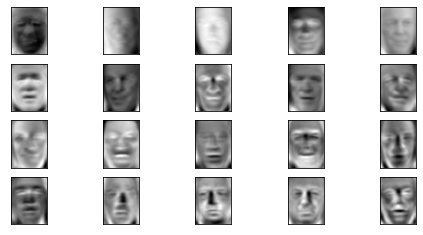

In [38]:
fig,axes = plt.subplots(4,5,figsize=(8,4),
                        subplot_kw = {"xticks":[],"yticks":[]}) #不要显示坐标轴 
for i,ax in enumerate(axes.flatten()):#二维不适于循环，故降维
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")#色彩模式colormap
plt.show()  #只是特征空间

In [43]:
X_dr=pca.transform(X)
X_dr.shape

(1348, 150)

In [45]:
X_inverse=pca.inverse_transform(X_dr)  #恢复原来图像
X_inverse.shape

(1348, 2914)

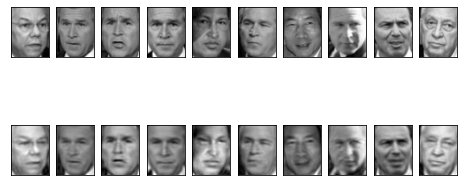

In [52]:
fig,axes = plt.subplots(2,10,figsize=(8,4),
                        subplot_kw = {"xticks":[],"yticks":[]}) #不要显示坐标轴 
for i in range(10):
    axes[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    axes[1,i].imshow(X_inverse[i,:].reshape(62,47),cmap="binary_r")
plt.show()  # 发现跟降维之前的图片是一样的,但更模糊一些，因为是从150个特征恢复回来的，说明有一些信息已经损失掉了

## 案例：手写数据

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()
data=digits.data
target=digits.target

In [4]:
digits.images.shape

(1797, 8, 8)

In [9]:
def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize=(10,4),
                            subplot_kw = {"xticks":[],"yticks":[]}) #不要显示坐标轴 
    for i,ax in enumerate(axes.flatten()):#二维不适于循环，故降维
        ax.imshow(data[i].reshape(8,8),cmap="binary")#色彩模式colormap
    plt.show()  #只是特征空间

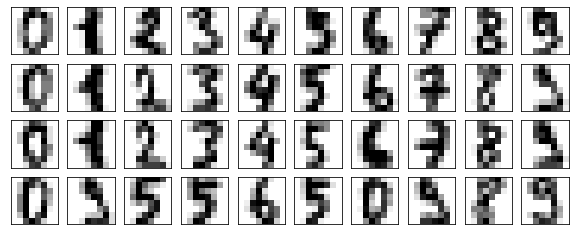

In [10]:
plot_digits(data)

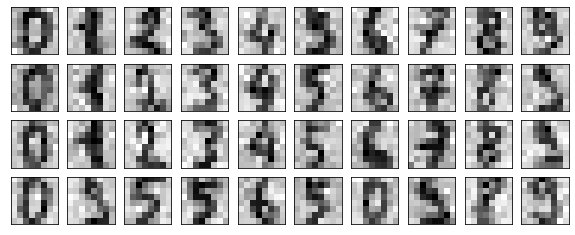

In [11]:
# 加噪音
noisy=np.random.normal(digits.data,2) #2是方差大小，抽取样本服从正态分布
plot_digits(noisy)

In [12]:
noisy.shape

(1797, 64)

In [16]:
pca=PCA(0.5,svd_solver='full').fit(noisy)
X_dr=pca.transform(noisy)
X_dr.shape
# 降到了6维,去除噪音

(1797, 6)

In [17]:
#降维后数据无法画图，想要观察，就得还原成原来的维度
X_dr_inverse=pca.inverse_transform(X_dr)

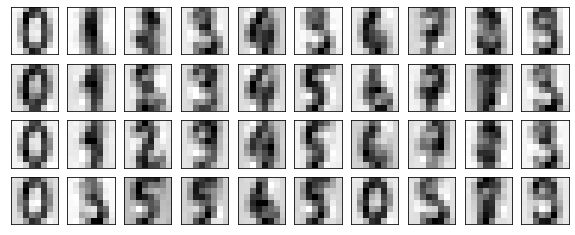

In [18]:
plot_digits(X_dr_inverse)